# Regression Exercises: Explore

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import wrangle as w
import explore as e

### 2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.


In [2]:
# acquire and clean data
df = w.wrangle_zillow()

In [3]:
# split
train, validate, test = w.split_function(df)

In [4]:
# make sample to speed up computations during exploration
trainsample = train.sample(n=1000, random_state=666)

### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


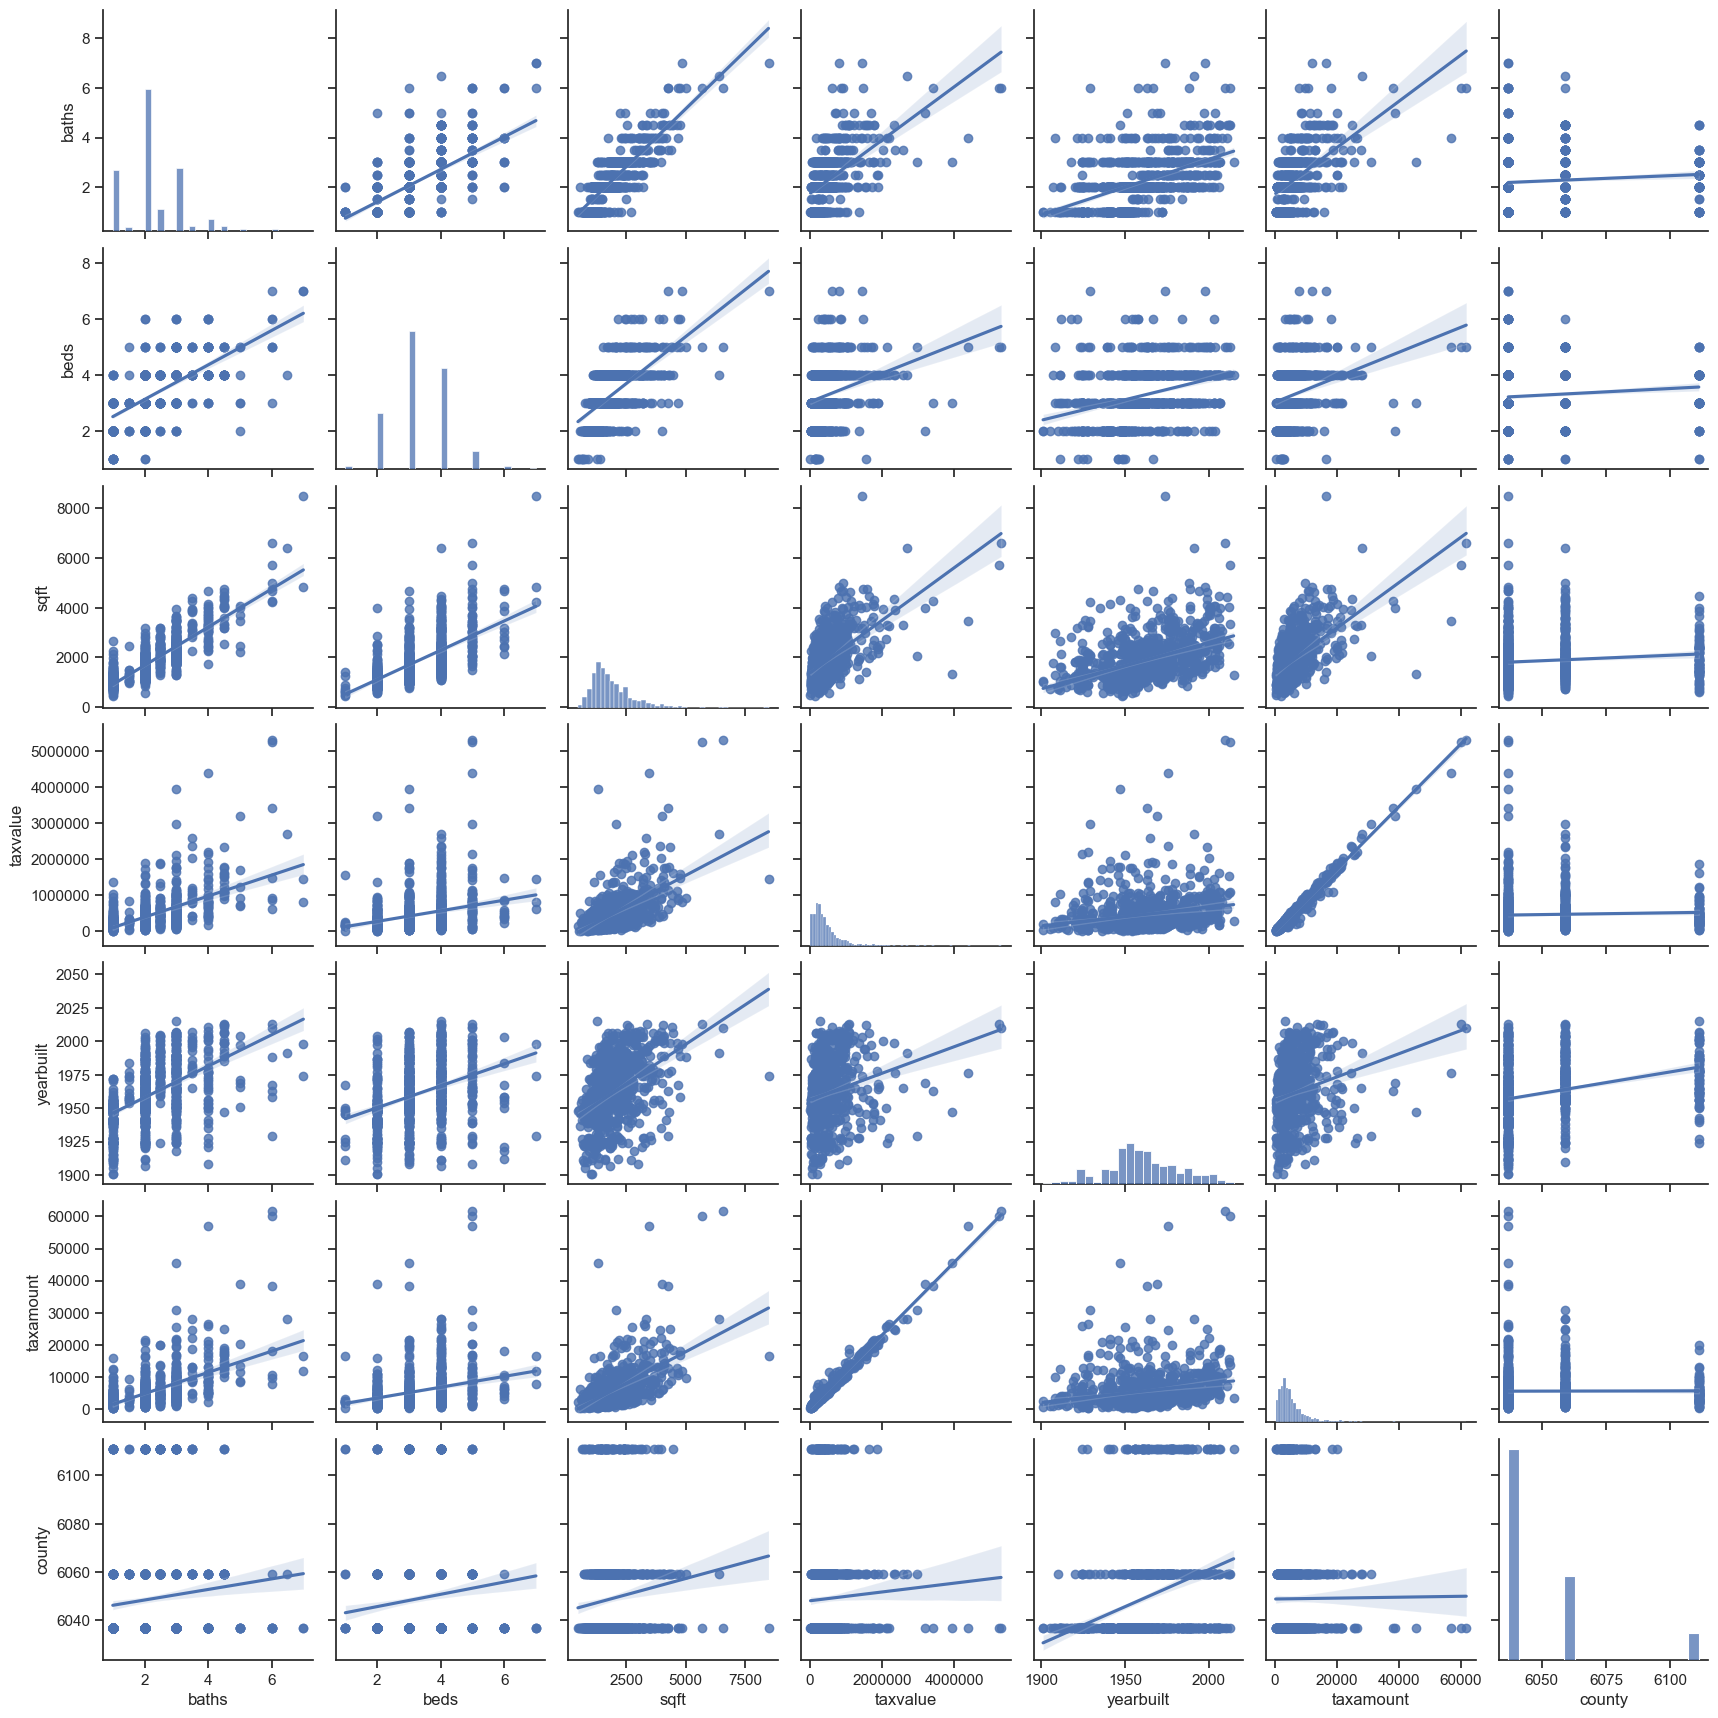

In [5]:
e.plot_variable_pairs(trainsample)

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



In [6]:
# create a new column with binned years
trainsample['decade_built'] = pd.cut(trainsample['yearbuilt'], bins=range(1900, 2021, 10), labels=range(1900, 2020, 10))

cat_cols = ["decade_built", "county", "baths", "beds"]
cont_cols = ["sqft", "taxvalue", "taxamount"]

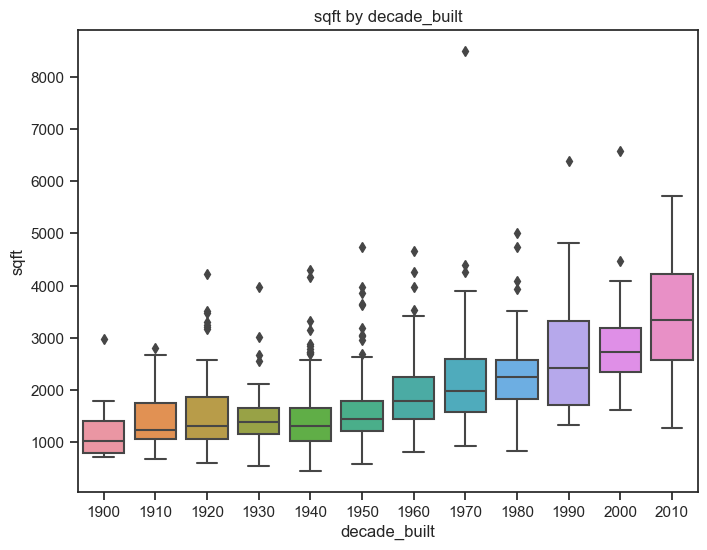

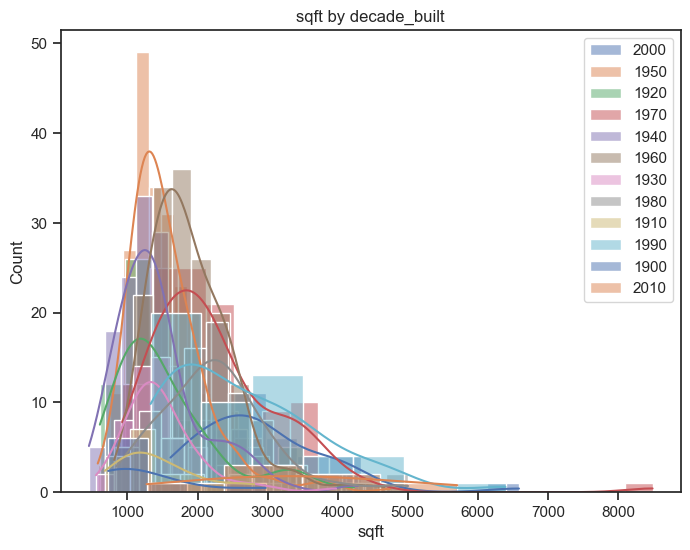

<Figure size 800x600 with 0 Axes>

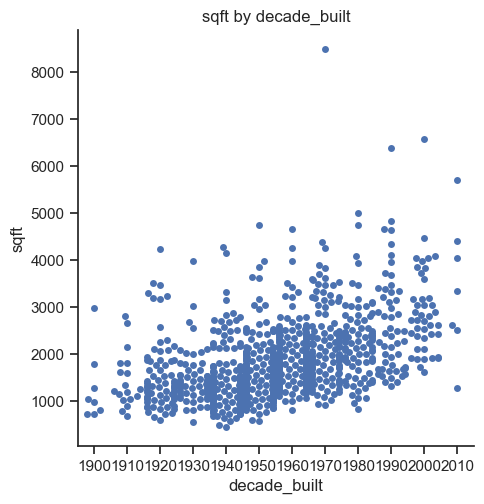

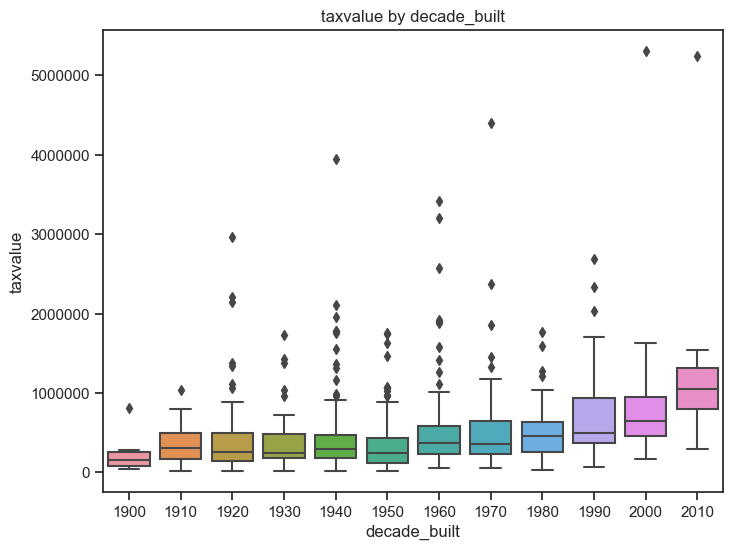

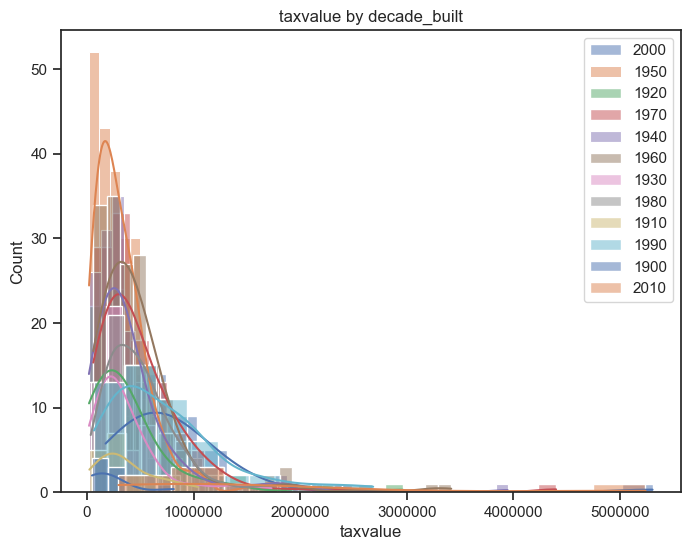

<Figure size 800x600 with 0 Axes>

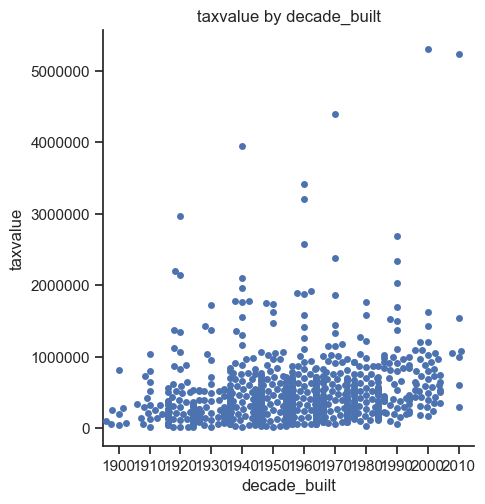

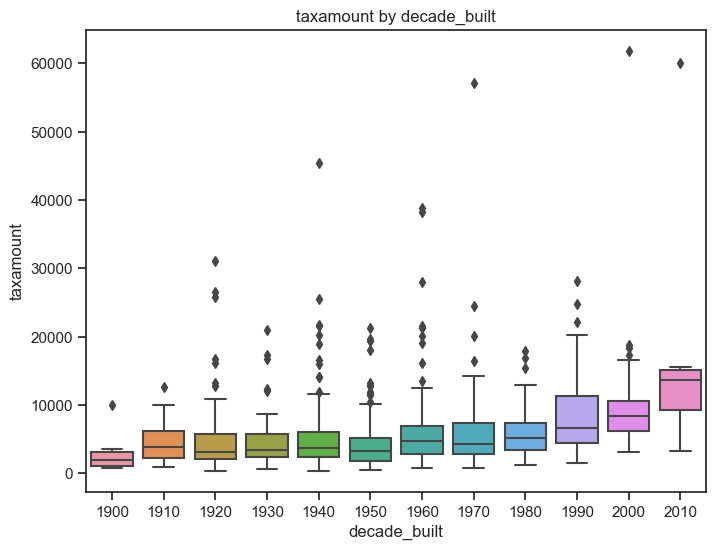

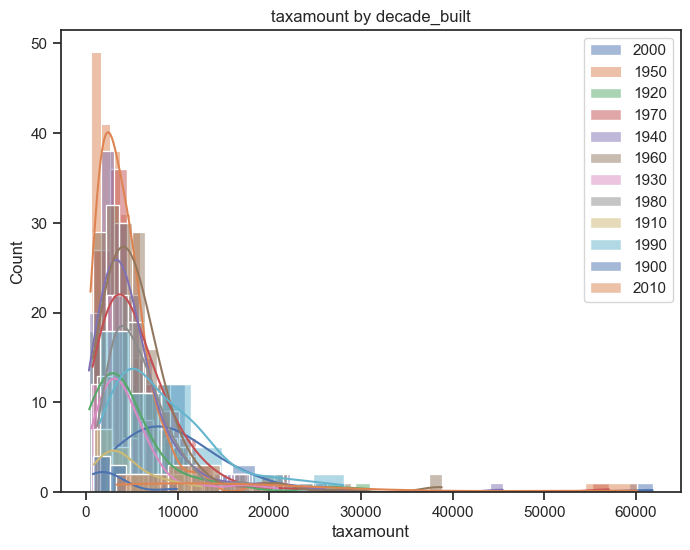

<Figure size 800x600 with 0 Axes>

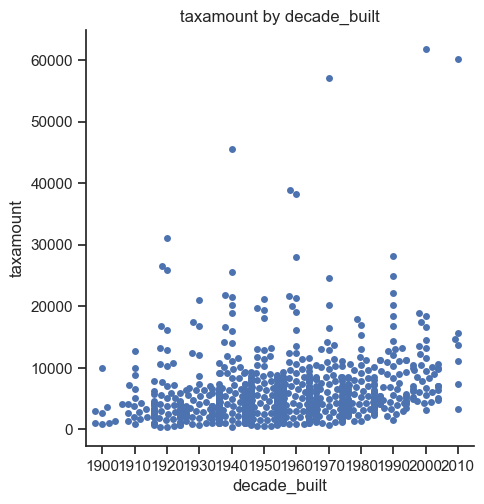

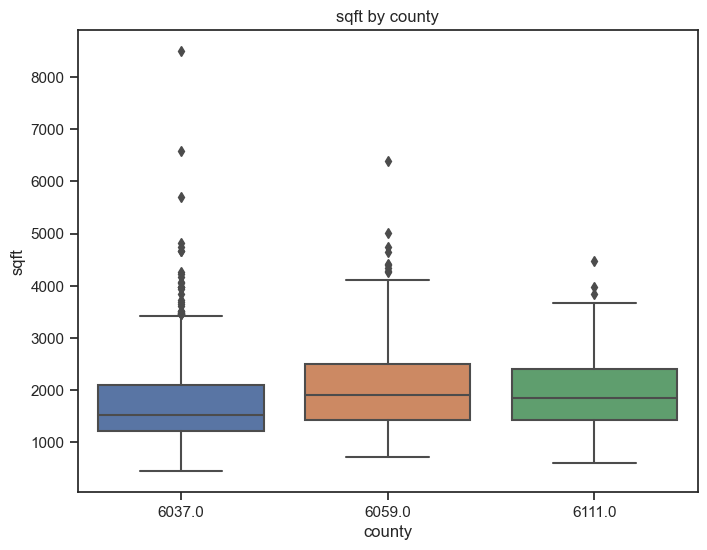

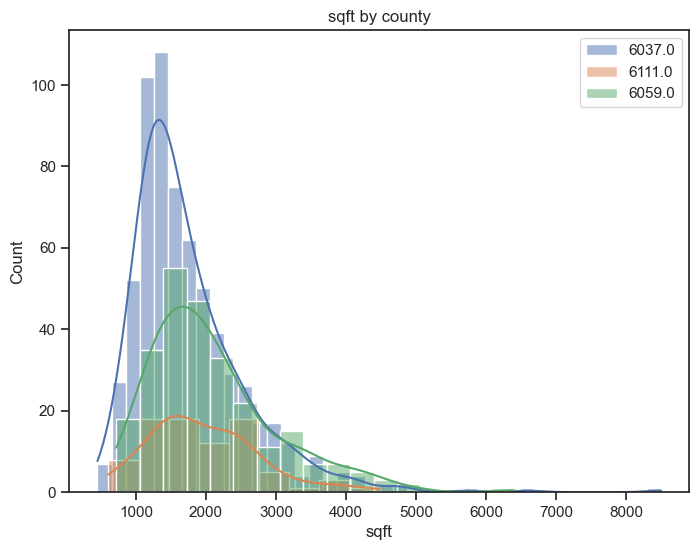

<Figure size 800x600 with 0 Axes>

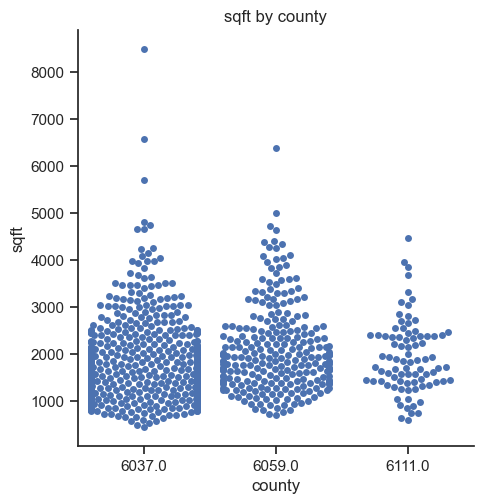

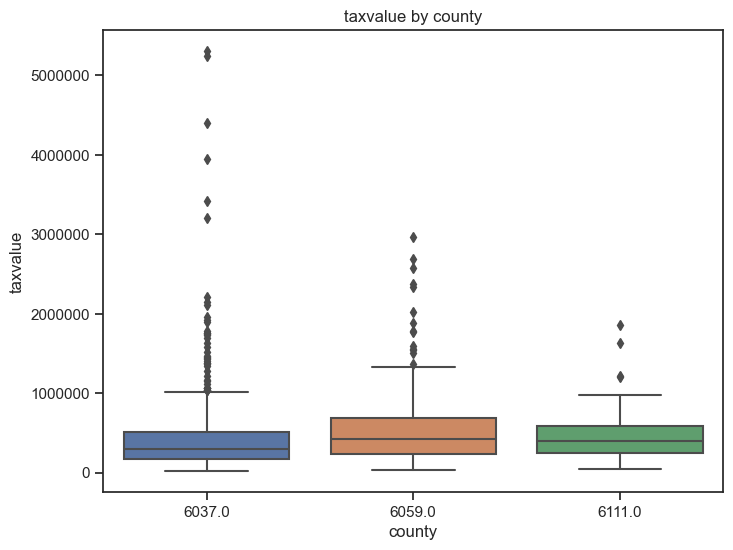

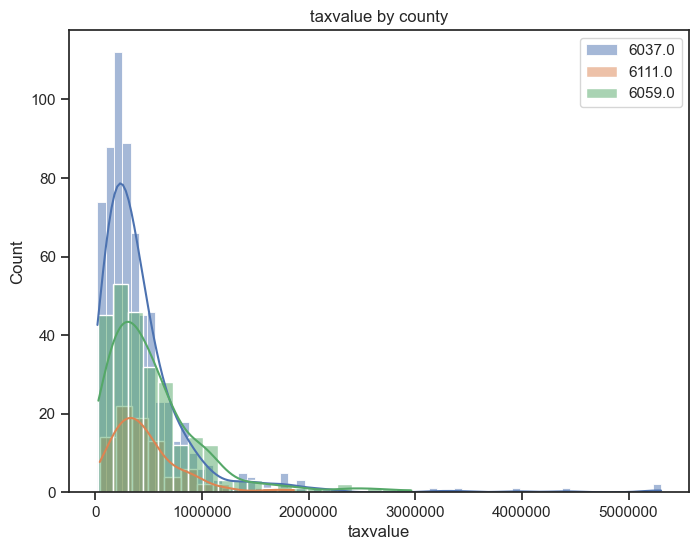

<Figure size 800x600 with 0 Axes>

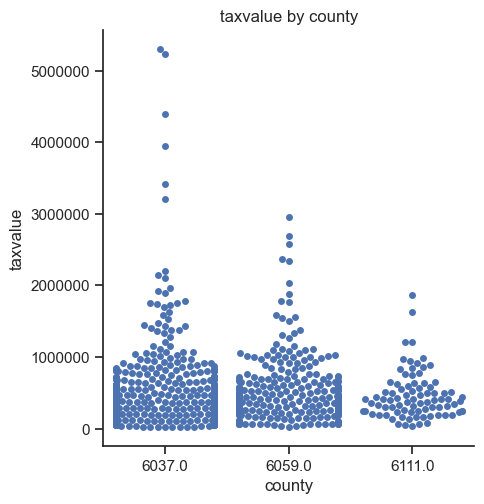

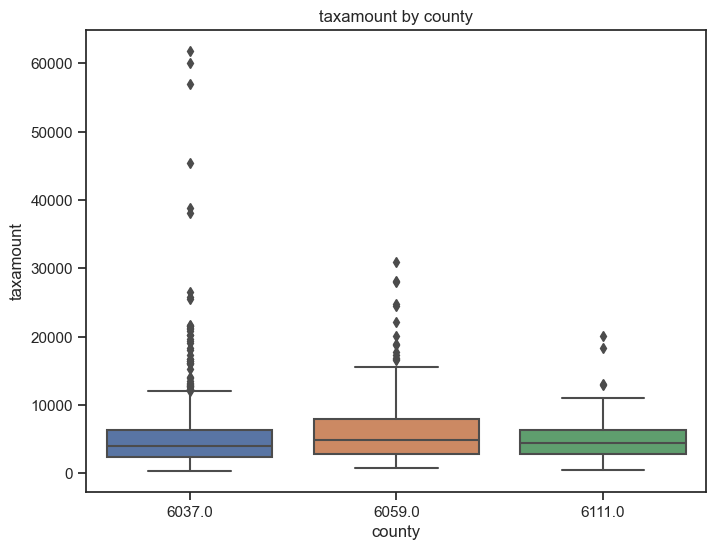

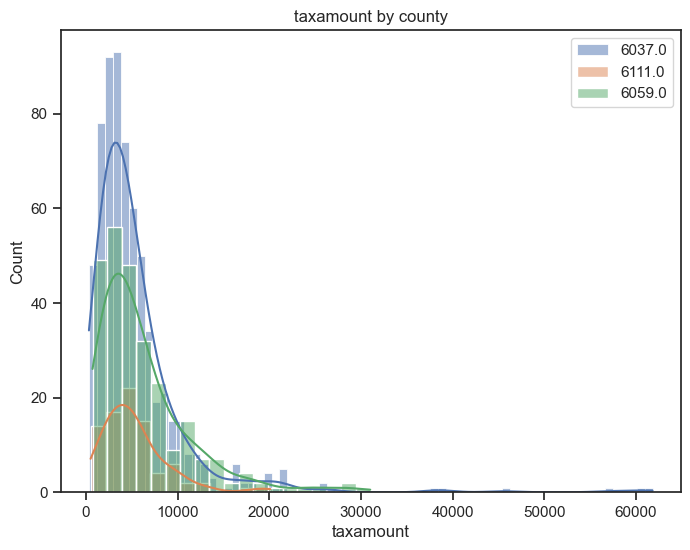

<Figure size 800x600 with 0 Axes>

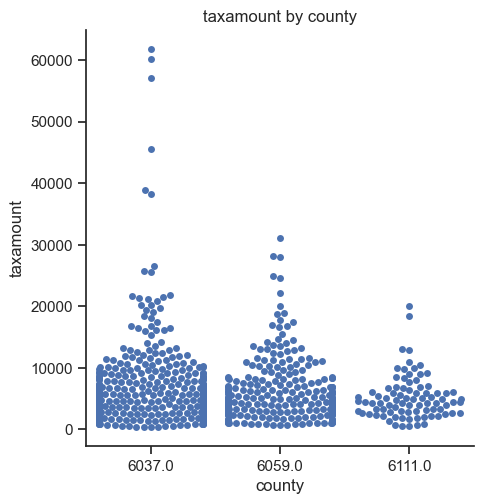

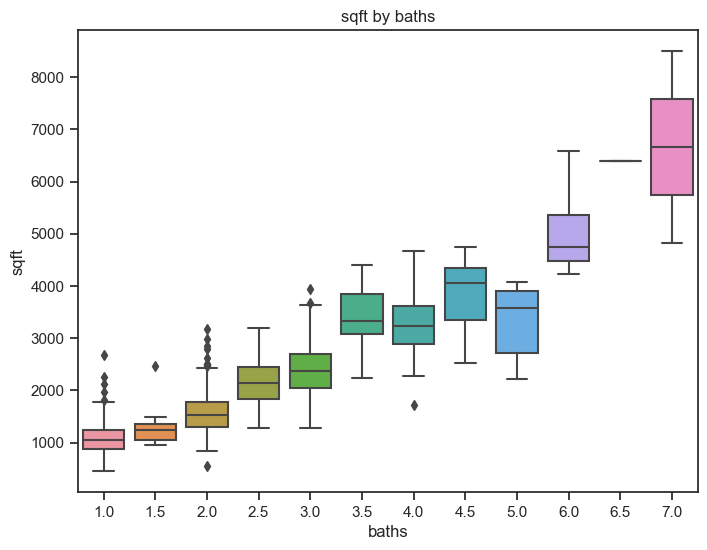

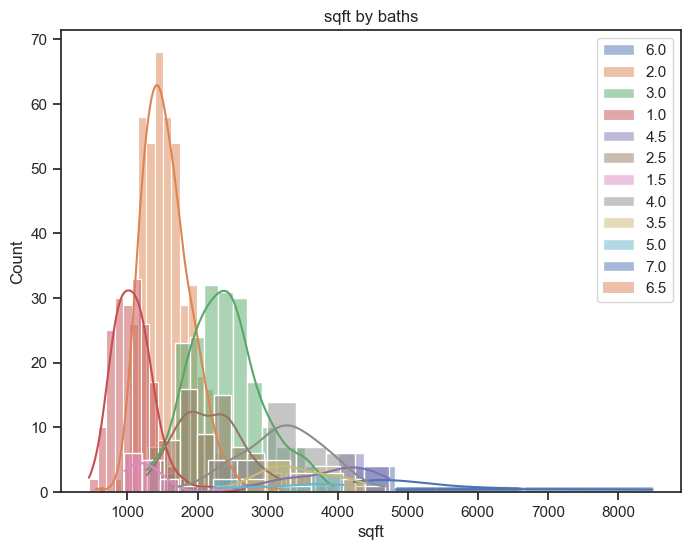

<Figure size 800x600 with 0 Axes>

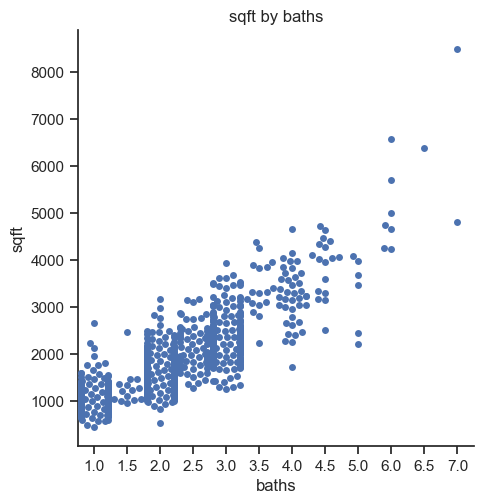

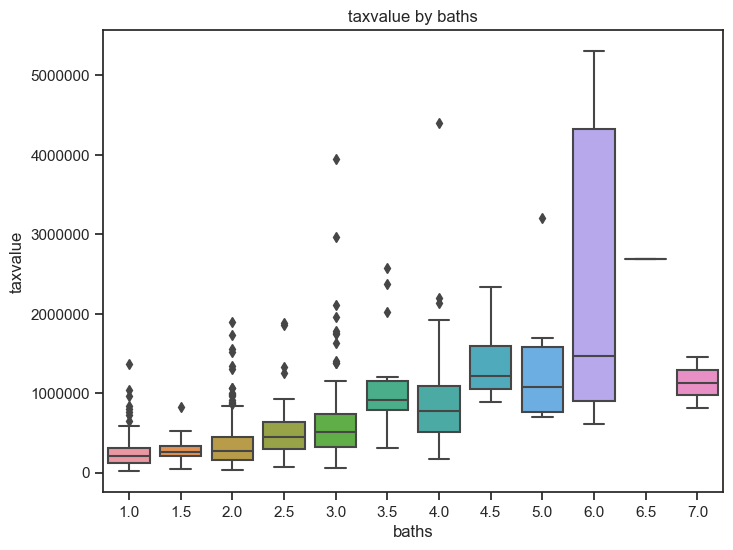

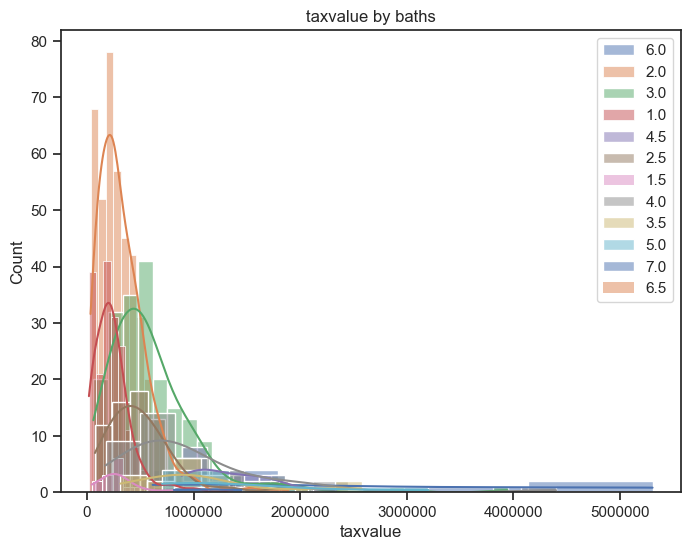

<Figure size 800x600 with 0 Axes>

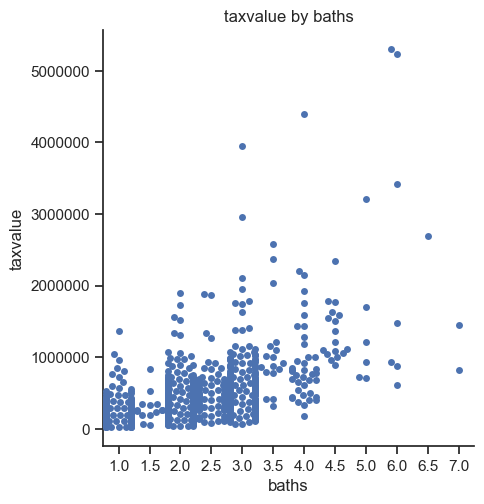

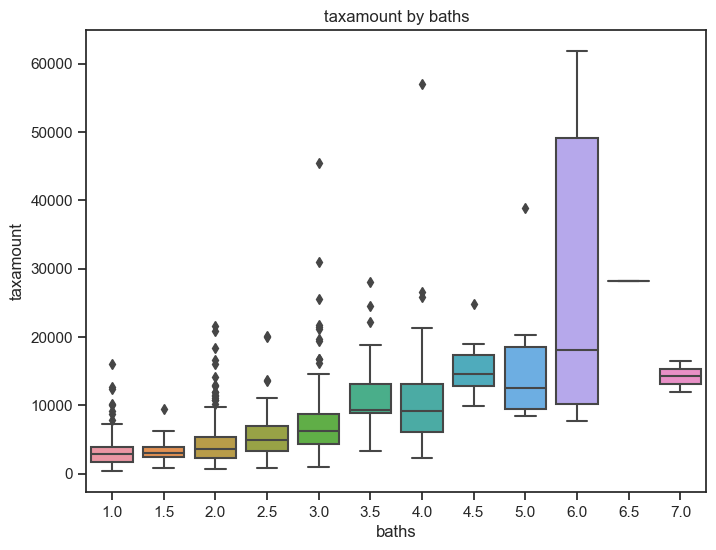

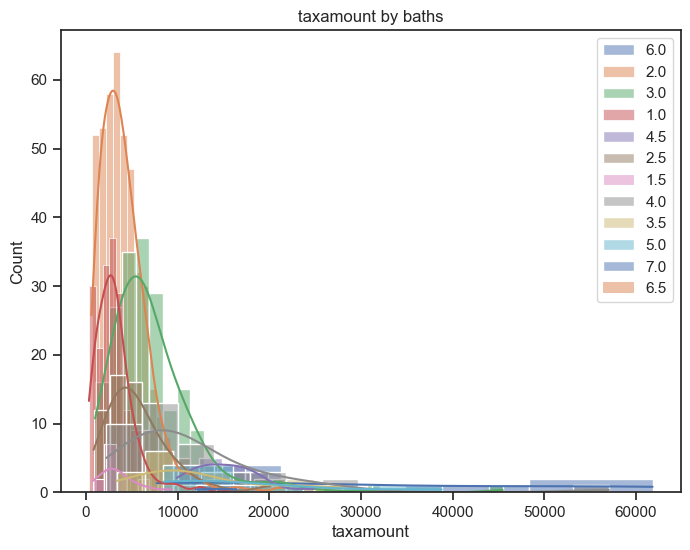

<Figure size 800x600 with 0 Axes>

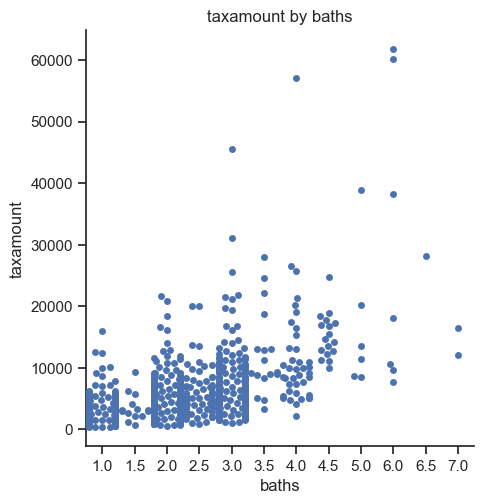

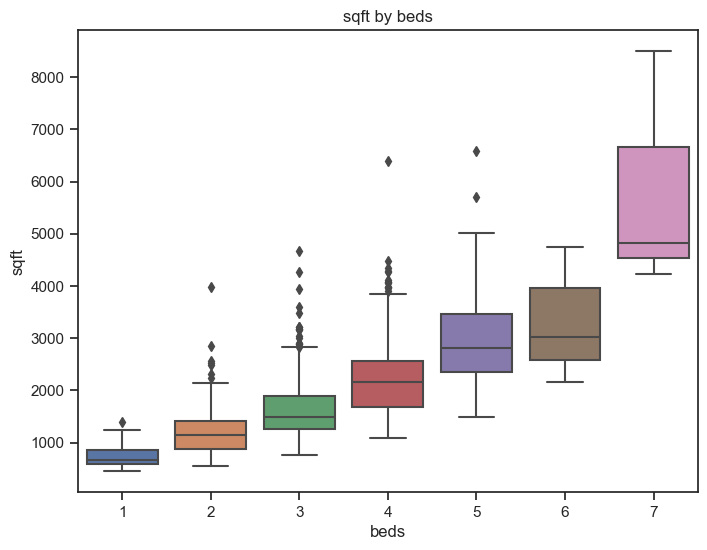

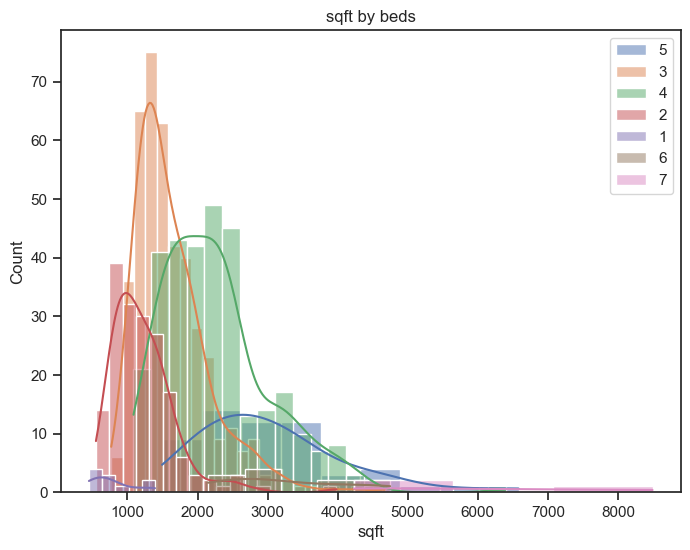

<Figure size 800x600 with 0 Axes>

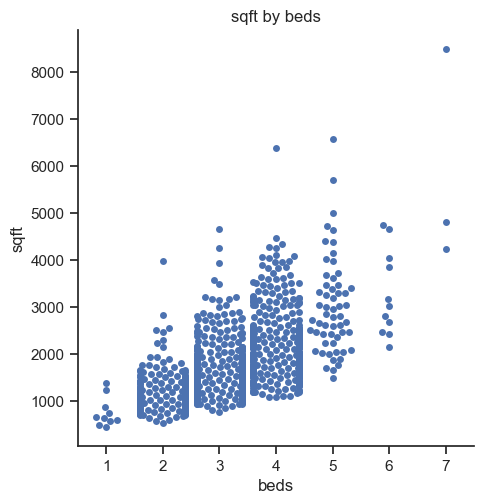

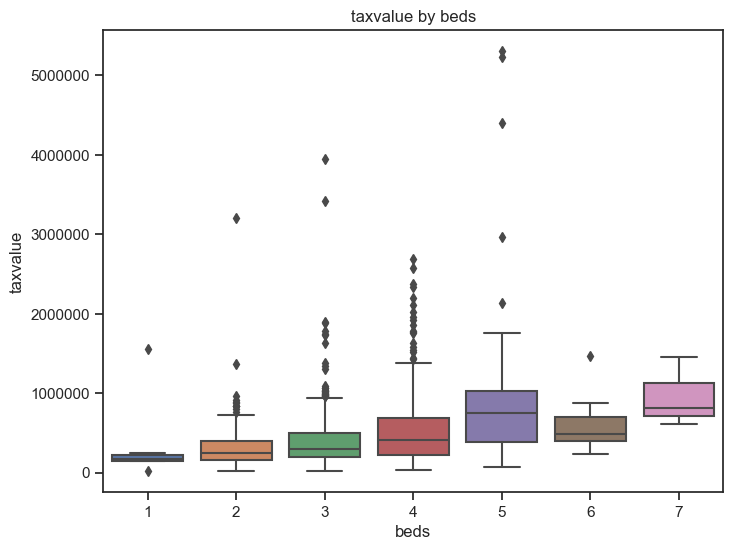

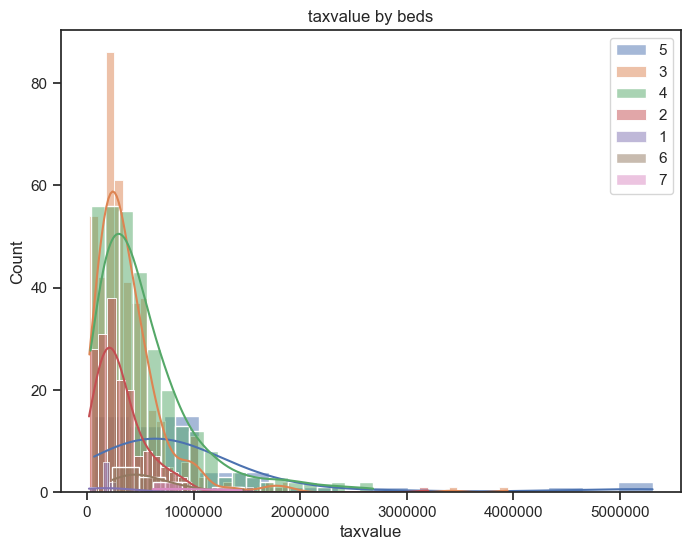

<Figure size 800x600 with 0 Axes>

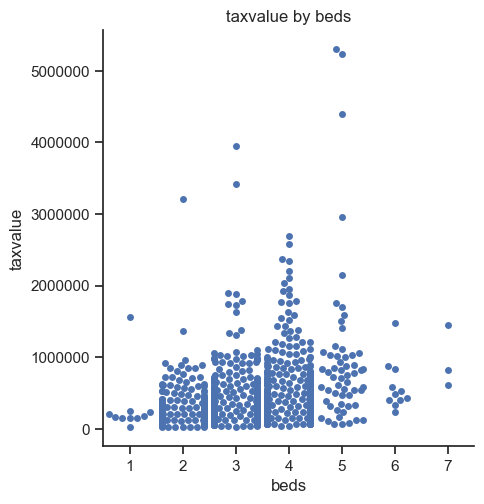

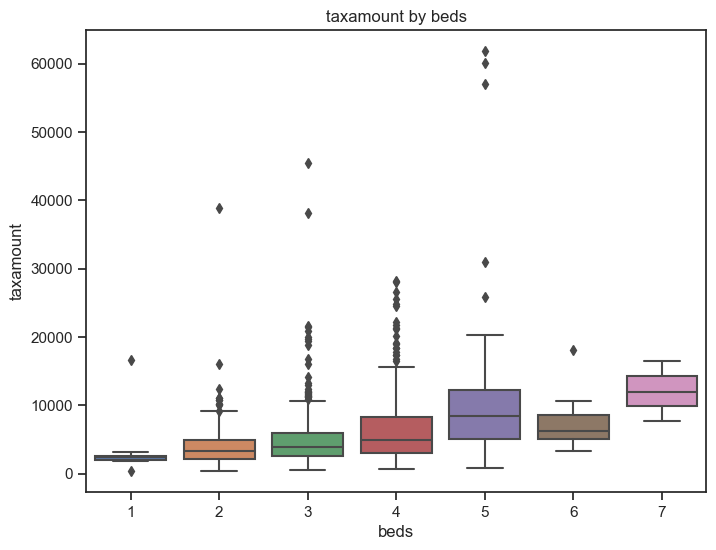

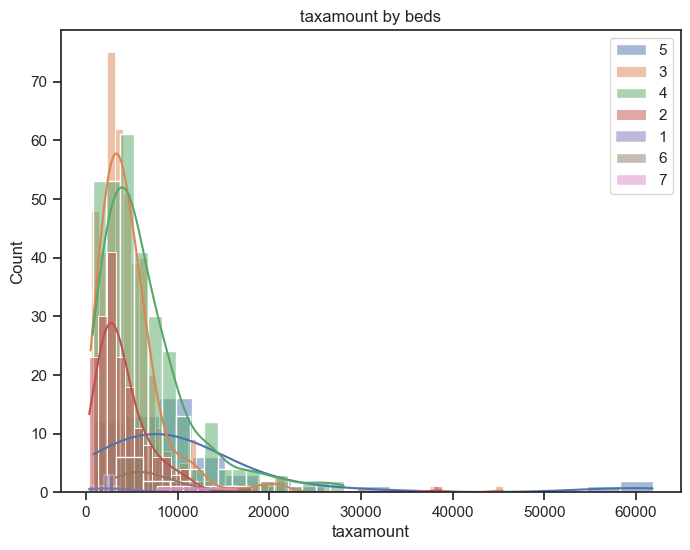

<Figure size 800x600 with 0 Axes>

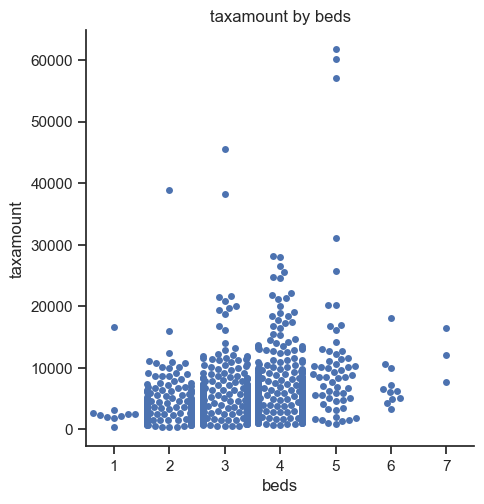

In [7]:
e.plot_categorical_and_continuous_vars(trainsample, cat_cols, cont_cols)

> Observations: Continuous Variables
> - Taxvalue and taxamount look to be near perfectly correlated. This makes sense as taxamount is derived from the taxvalue and any variation could likely be explained by home owner tax exemptions.
> - <b> sqft looks to have a positive correlation to taxvalue. Will proceed with hypothesis testing to this relationship. </b>

> Observations: Discreet
>- beds - looks to have a moderate positive linear correlation.
>- baths - looks to have a moderate positive linear correlation
>- yearbuilt - looks to have a small positive linear correlation, but unclear
>- county - County is a categorical variable and requires different stats testing. It does appear that county and taxvalue have a dependent relationship

## Hypothesis Testing
> - Taxvalue looks to be correlated with sqft, beds, baths, and yearbuild. 
> - Taxvalue and county look to have a dependent relationship

### Hypothesis

- ${H_0}$: There is no linear correlation between sqft and taxvalue
- ${H_a}$:  There is a linear correlation between sqft and taxvalue

In [28]:
# Set confidence level
alpha = 0.05

In [29]:
r, p = spearmanr(trainsample.sqft, trainsample.taxvalue)

In [31]:
if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a linear relationship betwen sqft and taxvalue.')
else:
    print('We fail to reject the null hypothesis')
    
print(r,p)

We can reject our null hypothesis and suggest that there is a linear relationship betwen sqft and taxvalue
0.5522423199624525 6.583112712954808e-81


### Hypothesis

- ${H_0}$: There is no ordinal correlation between beds and taxvalue
- ${H_a}$:  There is a ordinal correlation between beds and taxvalue

In [33]:
r, p = spearmanr(trainsample.beds, trainsample.taxvalue)

In [34]:
if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a relationship between beds and taxvalue.')
else:
    print('We fail to reject the null hypothesis')
    
print(r,p)

We can reject our null hypothesis and suggest that there is a relationship between beds and taxvalue.
0.2853362644348956 3.4536187202359395e-20


### Hypothesis

- ${H_0}$: There is no ordinal correlation between baths and taxvalue
- ${H_a}$:  There is a ordinal correlation between baths and taxvalue

In [35]:
r, p = spearmanr(trainsample.baths, trainsample.taxvalue)

In [36]:
if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a relationship between baths and taxvalue.')
else:
    print('We fail to reject the null hypothesis')
    
print(r,p)

We can reject our null hypothesis and suggest that there is a relationship between baths and taxvalue.
0.5302407977336031 1.3727480755707066e-73


### Hypothesis

- ${H_0}$: There is no ordinal correlation between yearbuilt and taxvalue
- ${H_a}$:  There is a ordinal correlation between yearbuilt and taxvalue

In [37]:
r, p = spearmanr(trainsample.yearbuilt, trainsample.taxvalue)

In [38]:
if p < alpha:
    print('We can reject our null hypothesis and suggest that there is a relationship between yearbuilt and taxvalue.')
else:
    print('We fail to reject the null hypothesis')
    
print(r,p)

We can reject our null hypothesis and suggest that there is a relationship between yearbuilt and taxvalue.
0.27765235813790023 3.6985657441962807e-19


## 10. What independent variables are correlated with the dependent variable, home value?


In [40]:
# correlation pivot:
# specify spearman relationships
corrs = trainsample.corr(method='spearman')
np.triu(corrs)

array([[1.        , 0.63292418, 0.82092001, 0.5302408 , 0.55315865,
        0.52909643, 0.180224  , 0.54756754],
       [0.        , 1.        , 0.64503524, 0.28533626, 0.40527522,
        0.29062746, 0.18078093, 0.40348453],
       [0.        , 0.        , 1.        , 0.55224232, 0.50945791,
        0.54967451, 0.19414893, 0.5005238 ],
       [0.        , 0.        , 0.        , 1.        , 0.27765236,
        0.98153507, 0.14802156, 0.27321003],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.27852007, 0.41438219, 0.98837509],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.08200006, 0.27484841],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.40161159],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

<Axes: >

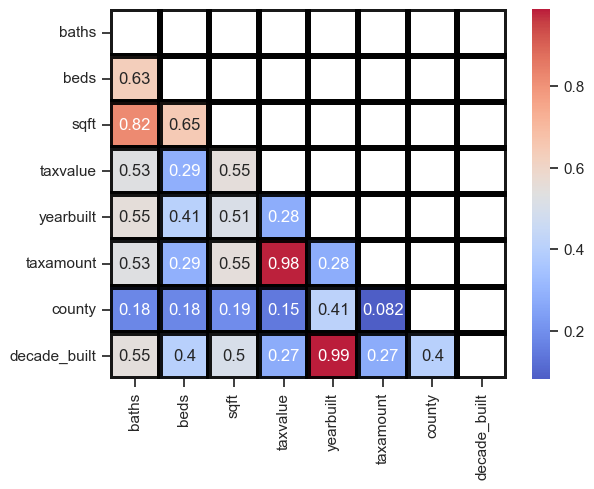

In [43]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black',
          'cmap': 'coolwarm',
          'annot': True,
          'mask': np.triu(corrs)}
# function call has no more stuff inline
sns.heatmap(corrs,
            **kwargs)

> Correlation Takeaways: <b>Taxvalue</b>
> - taxamount .98
> - sqft .55
> - baths .53
> - beds .29
> - yearbuilt .28
> - county .15

## 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

> Correlation Takeaways: 
> - sqft x baths: 0.82
> - sqft x beds: 0.65
> - beds x baths: 0.63
> - yearbuilt x baths: 0.55
> - yearbuilt x sqft: 0.51

## 13. Explore your dataset with any other visualizations you think will be helpful.

<Axes: xlabel='yearbuilt', ylabel='sqft'>

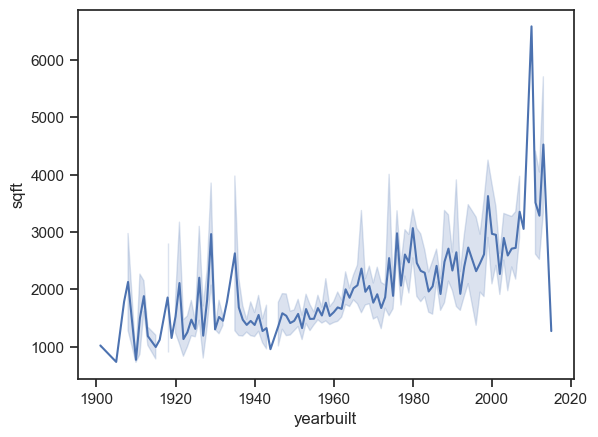

In [44]:
sns.lineplot(data=trainsample, x='yearbuilt', y='sqft')

<Axes: xlabel='yearbuilt', ylabel='baths'>

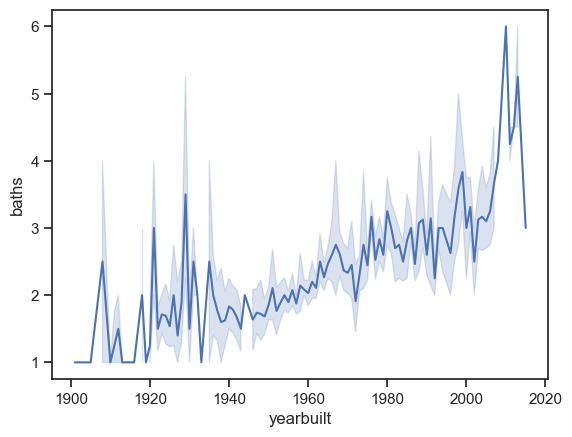

In [52]:
sns.lineplot(data=trainsample, x='yearbuilt', y='baths')

> Houses have been getting bigger overtime.

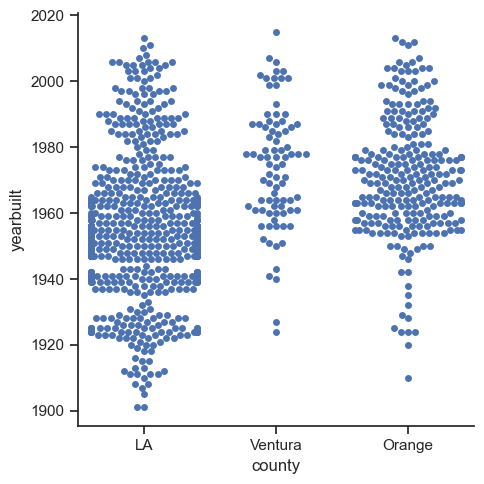

In [50]:
## Vizualize development over time in our counties

#rename those columns in temp df
trainsamp_county_names = trainsample
trainsamp_county_names.county = trainsamp_county_names.county.map({6037:'LA',6059:'Orange',6111:'Ventura'})
sns.catplot(data=trainsample, x='county', y='yearbuilt', kind='swarm')


> Development began in LA county much earlier than Orange and Ventura counties. From late 1930's to late 1970's LA was the peak of development in LA. Orange county had a peak from 1950 to late 1970's.